<h1 align="center">NEW YORK PIZZA HUNT</h1>

## STEP 1

In [42]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [43]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [44]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [45]:
neighborhoods_data = newyork_data['features']

In [46]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [47]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [48]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)

In [49]:
manhattan_data.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [50]:
address = 'Manhattan, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [41]:
##CLIENT_ID = 'HG1IXVSKMW3TIEM5IC5UE1PGPIESEHEWMULEJBW1YD1AGM4M' # your Foursquare ID
##CLIENT_SECRET = 'RASU4U0HIVUB10FTHXIWI5I4HPMTKZYAY0XDQ5TNJP1EZPJJ' # your Foursquare Secret
##VERSION = '20181205' # Foursquare API version


In [51]:
CLIENT_ID = 'X0H4PJN2L0PLBLPEXUM0JGAAUZKZQRG42EON0A2F3YK11ZRI' # your Foursquare ID
CLIENT_SECRET = 'EATPPEIF4VOWW4V4NYAYTCN3GFDLVLPUHBXIWAD5AYP4E5OP' # your Foursquare Secret
VERSION = '20181205' # Foursquare API version

print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_SECRET:EATPPEIF4VOWW4V4NYAYTCN3GFDLVLPUHBXIWAD5AYP4E5OP


## STEP 2

In [52]:
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['id'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Id Venue',
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
   
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

In [54]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Id Venue,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,4b4429abf964a52037f225e3,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,4baf59e8f964a520a6f93be3,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,4b79cc46f964a520c5122fe3,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,4bb114c4f964a520b9783ce3,Pizza Place
4,Marble Hill,40.876551,-73.91066,Loeser's Delicatessen,40.879242,-73.905471,4d9a37d4d97ba1430a07346b,Sandwich Place


In [55]:
manhattan_venues=manhattan_venues[manhattan_venues['Venue Category'] == "Pizza Place"].reset_index(drop=True)

In [56]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Id Venue,Venue Category
0,Marble Hill,40.876551,-73.910660,Arturo's,40.874412,-73.910271,4b4429abf964a52037f225e3,Pizza Place
1,Marble Hill,40.876551,-73.910660,Sam's Pizza,40.879435,-73.905859,4bb114c4f964a520b9783ce3,Pizza Place
2,Marble Hill,40.876551,-73.910660,Broadway Pizza & Pasta,40.878822,-73.904494,4be72770910020a16f1ad514,Pizza Place
3,Chinatown,40.715618,-73.994279,Scarr's Pizza,40.715335,-73.991649,56c3c626cd106998d2b196d0,Pizza Place
4,Chinatown,40.715618,-73.994279,Champion Pizza - Ludlow,40.719190,-73.988850,557a7031498e4837f11ba9e2,Pizza Place


## STEP 3

In [57]:
def getratingprice(ids):
    variables=[]
    contador=0
    for venueid in ids:
    
        contador=contador+1
        ##print(contador)
        # create the API request URL
        url1 = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venueid,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
        
        
         # make the GET request
        try:
            results3 = requests.get(url1).json()["response"]['venue']['rating']
        except:
            results3='NO'
        
        try:
            results4 = requests.get(url1).json()["response"]['venue']['price']['message']
        except:
            results4='NO'
        
        variables.append([results3,results4])
        
        if contador==len(ids):
            variables_nuevas = pd.DataFrame(variables)
            variables_nuevas.columns = ['rating','price'] 
               
  
    return(variables_nuevas)
       


    

In [58]:
ids=manhattan_venues['Id Venue']
prices_ids = getratingprice(ids)

In [59]:
manhattan_venues=pd.concat([manhattan_venues,prices_ids], axis=1)

In [60]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Id Venue,Venue Category,rating,price
0,Marble Hill,40.876551,-73.910660,Arturo's,40.874412,-73.910271,4b4429abf964a52037f225e3,Pizza Place,8.5,Cheap
1,Marble Hill,40.876551,-73.910660,Sam's Pizza,40.879435,-73.905859,4bb114c4f964a520b9783ce3,Pizza Place,8.9,Cheap
2,Marble Hill,40.876551,-73.910660,Broadway Pizza & Pasta,40.878822,-73.904494,4be72770910020a16f1ad514,Pizza Place,7.6,Cheap
3,Chinatown,40.715618,-73.994279,Scarr's Pizza,40.715335,-73.991649,56c3c626cd106998d2b196d0,Pizza Place,8.9,Cheap
4,Chinatown,40.715618,-73.994279,Champion Pizza - Ludlow,40.719190,-73.988850,557a7031498e4837f11ba9e2,Pizza Place,9.3,Cheap


In [61]:
manhattan_venues['price'] = manhattan_venues['price'].map({'Cheap': 4, 'Moderate': 3,'Expensive':2,'Very Expensive':1})

In [63]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Id Venue,Venue Category,rating,price
0,Marble Hill,40.876551,-73.910660,Arturo's,40.874412,-73.910271,4b4429abf964a52037f225e3,Pizza Place,8.5,4
1,Marble Hill,40.876551,-73.910660,Sam's Pizza,40.879435,-73.905859,4bb114c4f964a520b9783ce3,Pizza Place,8.9,4
2,Marble Hill,40.876551,-73.910660,Broadway Pizza & Pasta,40.878822,-73.904494,4be72770910020a16f1ad514,Pizza Place,7.6,4
3,Chinatown,40.715618,-73.994279,Scarr's Pizza,40.715335,-73.991649,56c3c626cd106998d2b196d0,Pizza Place,8.9,4
4,Chinatown,40.715618,-73.994279,Champion Pizza - Ludlow,40.719190,-73.988850,557a7031498e4837f11ba9e2,Pizza Place,9.3,4


## STEP 4

In [64]:
kmeansdata=manhattan_venues.drop(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Id Venue','Venue Category'], axis=1)

In [65]:
# set number of clusters
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kmeansdata)

In [66]:
manhattan_venues.insert(0, 'Cluster Labels', kmeans.labels_)


In [67]:
manhattan_venues.head()

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Id Venue,Venue Category,rating,price
0,1,Marble Hill,40.876551,-73.910660,Arturo's,40.874412,-73.910271,4b4429abf964a52037f225e3,Pizza Place,8.5,4
1,2,Marble Hill,40.876551,-73.910660,Sam's Pizza,40.879435,-73.905859,4bb114c4f964a520b9783ce3,Pizza Place,8.9,4
2,3,Marble Hill,40.876551,-73.910660,Broadway Pizza & Pasta,40.878822,-73.904494,4be72770910020a16f1ad514,Pizza Place,7.6,4
3,2,Chinatown,40.715618,-73.994279,Scarr's Pizza,40.715335,-73.991649,56c3c626cd106998d2b196d0,Pizza Place,8.9,4
4,2,Chinatown,40.715618,-73.994279,Champion Pizza - Ludlow,40.719190,-73.988850,557a7031498e4837f11ba9e2,Pizza Place,9.3,4


In [68]:
k_means_labels = kmeans.labels_
k_means_labels

array([1, 2, 3, 2, 2, 1, 2, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       1, 3, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 3, 1, 1, 0,
       1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 2], dtype=int32)

In [69]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_venues['Venue Latitude'], manhattan_venues['Venue Longitude'], manhattan_venues['Neighborhood'], manhattan_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

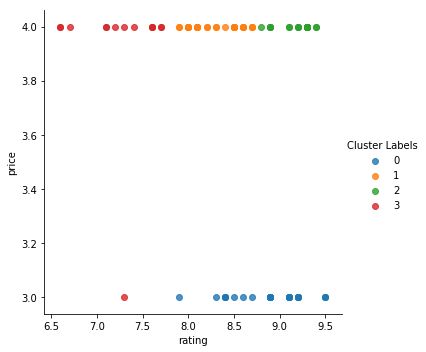

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot( x='rating', y='price', data=manhattan_venues, fit_reg=False, hue='Cluster Labels', legend=True)

In [71]:
preferred=manhattan_venues[manhattan_venues['Cluster Labels'] ==2]
preferred

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Id Venue,Venue Category,rating,price
1,2,Marble Hill,40.876551,-73.910660,Sam's Pizza,40.879435,-73.905859,4bb114c4f964a520b9783ce3,Pizza Place,8.9,4
3,2,Chinatown,40.715618,-73.994279,Scarr's Pizza,40.715335,-73.991649,56c3c626cd106998d2b196d0,Pizza Place,8.9,4
4,2,Chinatown,40.715618,-73.994279,Champion Pizza - Ludlow,40.719190,-73.988850,557a7031498e4837f11ba9e2,Pizza Place,9.3,4
6,2,Washington Heights,40.851903,-73.936900,Bodega Pizza,40.856998,-73.932481,573313f1498e7f7dfeb0e849,Pizza Place,8.9,4
11,2,Inwood,40.867684,-73.921210,Pizza Palace,40.862414,-73.925134,4bf9af8c5317a59324b5017f,Pizza Place,8.8,4
25,2,East Harlem,40.792249,-73.944182,Patsy's Pizza - East Harlem,40.797108,-73.934626,46615a4ff964a52064471fe3,Pizza Place,9.1,4
41,2,Midtown,40.754691,-73.981669,Roberta's,40.754465,-73.976939,55f9a2e8498e3c4b5a105eab,Pizza Place,8.9,4
42,2,Midtown,40.754691,-73.981669,Joe's Pizza,40.754609,-73.986815,598de3c33b83073f81718721,Pizza Place,9.1,4
46,2,Greenwich Village,40.726933,-73.999914,Emily West Village,40.729337,-74.003724,593332f9123a1963f539daa0,Pizza Place,9.3,4
47,2,Greenwich Village,40.726933,-73.999914,Joe's Pizza,40.730491,-74.001881,45ebc982f964a52091431fe3,Pizza Place,9.2,4


In [72]:
preferred.groupby("Neighborhood").count()

,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Id Venue,Venue Category,rating,price
Neighborhood,,,,,,,,,,
Chinatown,2,2,2,2,2,2,2,2,2,2
East Harlem,1,1,1,1,1,1,1,1,1,1
East Village,1,1,1,1,1,1,1,1,1,1
Flatiron,1,1,1,1,1,1,1,1,1,1
Gramercy,1,1,1,1,1,1,1,1,1,1
Greenwich Village,2,2,2,2,2,2,2,2,2,2
Hudson Yards,1,1,1,1,1,1,1,1,1,1
Inwood,1,1,1,1,1,1,1,1,1,1
Little Italy,2,2,2,2,2,2,2,2,2,2
